In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler ,FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [107]:
# import csv files 

data = pd.read_csv("../DataSets/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [108]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [109]:
data.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [110]:
## Fill the nan values with mean
data.fillna(data.mean() , inplace = True)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


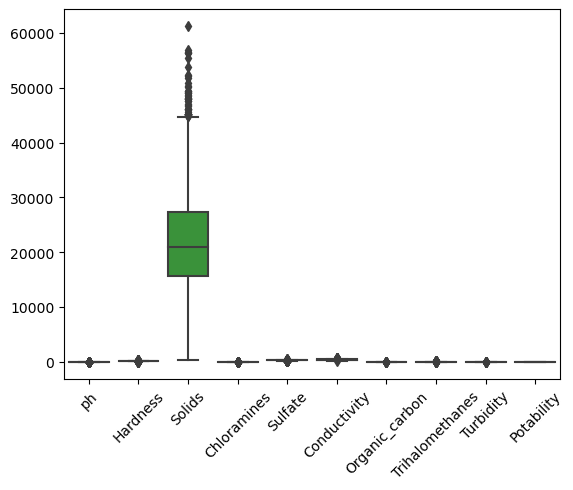

In [111]:
# now try to visualize it 


sns.boxplot(data = data )
plt.xticks(rotation = 45);

<Axes: >

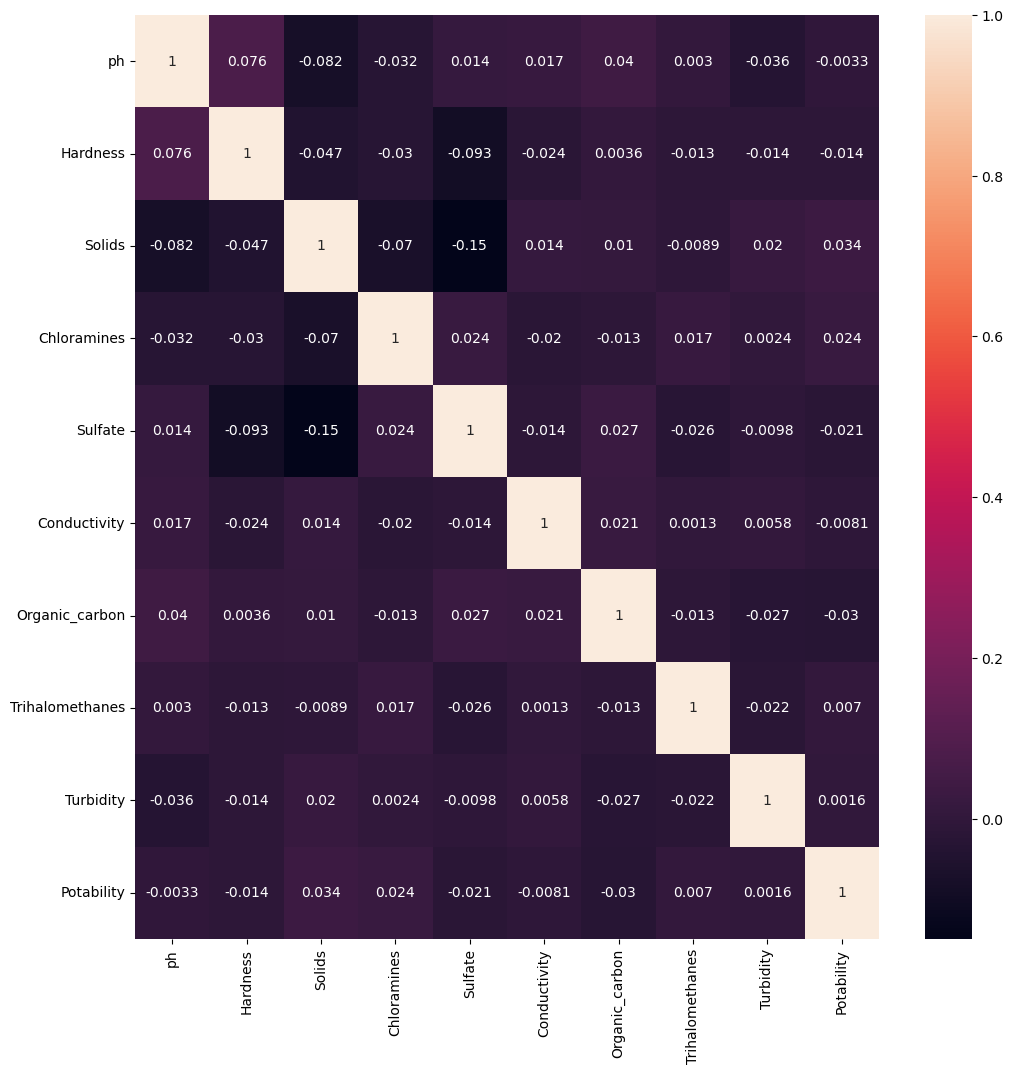

In [112]:
d = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(d,annot=True)

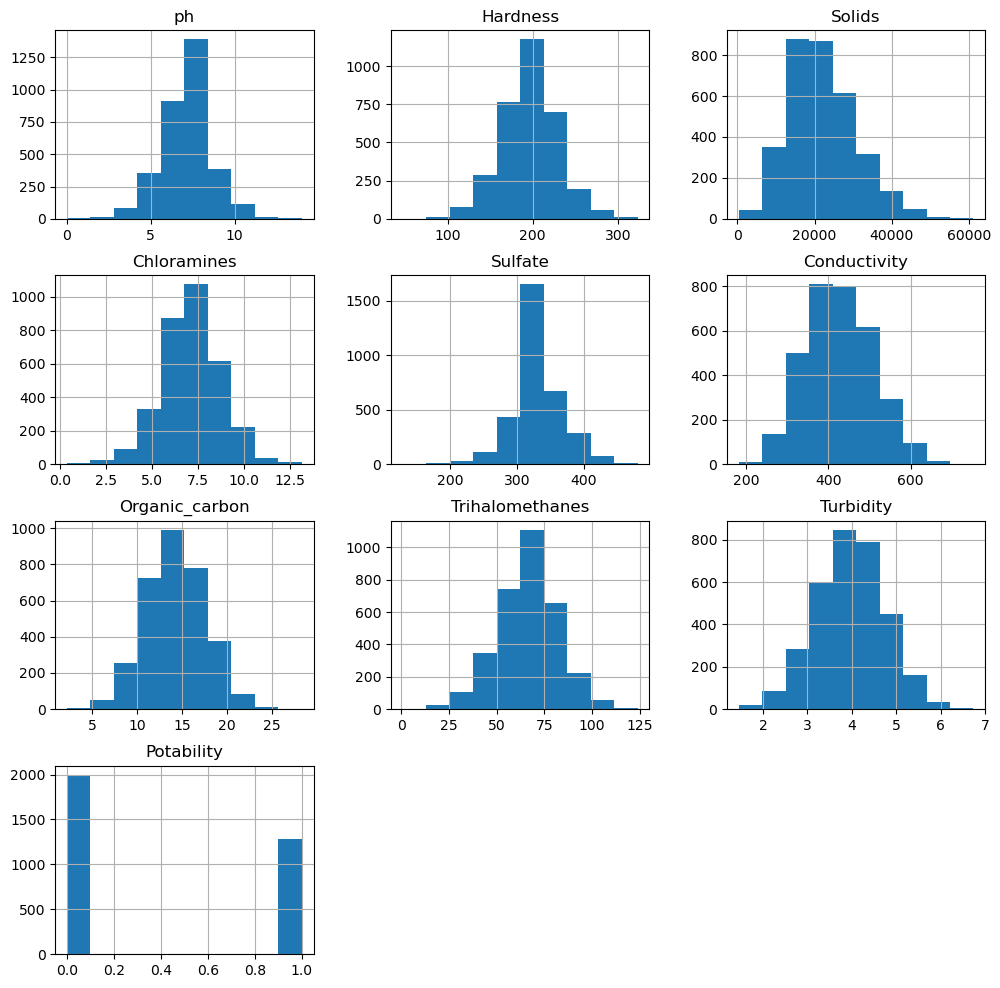

In [113]:
data.hist(figsize=(12,12));

In [114]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [115]:

X = data.drop("Potability",axis=1)
Y = data["Potability"]
 



scaler = Pipeline([("scaler",StandardScaler())])


preprocessing  = ColumnTransformer([("scaler",scaler,X.columns)])

pipeline  = Pipeline([("preprocessor",preprocessing ),
                     ("estimator",KNeighborsClassifier())])
# train _test_split
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(X , Y ,test_size =0.2 ,random_state = 42)

pipeline.fit(x_train ,y_train)
pipeline.score(x_test , y_test)


0.6280487804878049

In [116]:
params = {
    "estimator__n_neighbors": [1, 5, 10],
    "estimator__leaf_size": [1,  45],
    "estimator__weights": ["uniform", "distance"]
}

grid = GridSearchCV(pipeline, params ,cv = 5)
grid.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object'))])),
                                       ('estimator', KNeighborsClassifier())]),
             param_grid={'estimator__leaf_size': [1, 45],
                         'estimator__n_neighbors': [1, 5, 10],
                         'estimator__weights': ['uniform', 'distance']})

In [117]:
grid.best_params_

{'estimator__leaf_size': 1,
 'estimator__n_neighbors': 10,
 'estimator__weights': 'uniform'}

In [118]:
grid.best_score_

0.6358778625954198

In [119]:
y_pred = grid.predict(x_test)
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
208,10.026159,224.266358,14962.177833,7.428313,336.972950,517.512842,18.858519,65.363452,4.182278
1578,6.865569,231.445054,22585.788809,5.676387,333.775777,496.603425,16.154964,91.461709,4.916218
565,7.459145,217.700130,19436.503542,4.639116,352.424439,494.094339,14.460295,57.196188,3.841052
313,5.862641,185.065220,44069.272158,4.382721,412.690111,331.570139,15.306079,59.605812,5.507421


In [121]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [129]:
# Prompt the user for input
ph = float(input("Enter the pH: "))
hardness = float(input("Enter the Hardness: "))
solids = float(input("Enter the Solids: "))
chloramines = float(input("Enter the Chloramines: "))
sulfate = float(input("Enter the Sulfate: "))
conductivity = float(input("Enter the Conductivity: "))
organic_carbon = float(input("Enter the Organic Carbon: "))
trihalomethanes = float(input("Enter the Trihalomethanes: "))
turbidity = float(input("Enter the Turbidity: "))

# Create a DataFrame with the user input
data = pd.DataFrame({
    'ph': [ph],
    'Hardness': [hardness],
    'Solids': [solids],
    'Chloramines': [chloramines],
    'Sulfate': [sulfate],
    'Conductivity': [conductivity],
    'Organic_carbon': [organic_carbon],
    'Trihalomethanes': [trihalomethanes],
    'Turbidity': [turbidity]
})

# Predict the data

transformData = pipeline["preprocessor"].transform(data)
prediction = pipeline["estimator"].predict(transformData)

print("The Label is:", prediction[0])

Enter the pH: 7
Enter the Hardness: 204
Enter the Solids: 20791
Enter the Chloramines: 7.30
Enter the Sulfate: 368
Enter the Conductivity: 563.3
Enter the Organic Carbon: 10.37
Enter the Trihalomethanes: 86.9
Enter the Turbidity: 2.9
The Label is: 0
